In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.optimize import curve_fit

In [106]:
#N, a, z fast. I varieres
theta_I = np.array([14, 26, 32, 42, 48, 54, 58, 60]) * np.pi/180
I_I = np.array([0.25, 0.54, 0.75, 0.99, 1.25, 1.49, 1.75, 2.00]) # A
N_I = np.array([1]*len(I_I))
a_I = np.array([5 * 0.01]*len(I_I))
z_I = np.array([0*0.01]*len(I_I))

Delta_I = 0.01
Delta_theta = 2 * np.pi/180
Delta_a = 0.1 * 0.01
Delta_z = 0.2 * 0.01


In [107]:
#N, I, a fast. z varieres
theta_z = np.array([54, 44, 40, 34, 26, 20, 14, 12, 8, 4, 4, 4])* np.pi/180
z_z = np.array([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 15])*0.01
I_z = np.array([1.5]*len(z_z))
N_z = np.array([1]*len(z_z))
a_z = np.array([5 *0.01]*len(z_z))


In [108]:
# N, I, Z fast. a varieres
theta_a = np.array([42, 34, 26, 24])* np.pi/180
a_a = np.array([5, 6.5, 8, 9.5])*0.01
I_a = np.array([1]*len(a_a))
N_a = np.array([1]*len(a_a))
z_a = np.array([0*0.01]*len(a_a))


In [109]:
# I, z, a, fast. N varieres
theta_N = np.array([22, 34, 46, 54])* np.pi/180
N_N = np.array([1, 2, 3, 4])
I_N = np.array([0.75]*len(N_N))
z_N = np.array([0*0.01]*len(N_N))
a_N = np.array([9.5*0.01]*len(N_N))


In [110]:
keys = ["theta", "I", "N", "a", "z"]

temp_I = []
for i in range(len(theta_I)):
    temp_I.append({k:v for (k, v) in zip(keys, [theta_I[i], I_I[i], N_I[i], a_I[i], z_I[i]])})
temp_z =[]
for i in range(len(theta_z)):
    temp_z.append({k:v for (k, v) in zip(keys, [theta_z[i], I_z[i], N_z[i], a_z[i], z_z[i]])})
temp_a = []
for i in range(len(theta_a)):
    temp_a.append({k:v for (k, v) in zip(keys, [theta_a[i], I_a[i], N_a[i], a_a[i], z_a[i]])})
temp_N = []
for i in range(len(theta_N)):
    temp_I.append({k:v for (k, v) in zip(keys, [theta_N[i], I_N[i], N_N[i], a_N[i], z_N[i]])})


data = [
    *temp_I, *temp_z, *temp_a, *temp_N
    ]

data = pd.DataFrame(data)


In [111]:
data["B_z"] = 1.26*10**(-6)*data.I*data.N*(data.a)**2/(2*(data.a**2+data.z**2)**(3/2)) #Magnetfelt udregnes

def theta_from_B(B_e): # Funktion der giver vinkel, ud fra jordens magnetfelt
    return np.arctan2(data.B_z, B_e)

def log_L(B_e): # Likelihood funktion
    return np.sum(np.log(norm.pdf(data.theta, loc=theta_from_B(B_e), scale=(np.sqrt(Delta_theta**2)))))

def log_prior(B_e): # Prior, meget bred
    return np.sum(np.log(norm.pdf(B_e, loc=1.71*10**(-5), scale=10*1.28*10**(-7))))


In [113]:
B_e = np.linspace(1.71*10**(-5)-100*1.28*10**(-7), 1.71*10**(-5)+10*1.28*10**(-7), 2000)
logL = np.empty(B_e.shape)
logPrior = np.empty(B_e.shape)

# Selve udregningen:
for ix, b_e in enumerate(B_e): 
    logL[ix] = log_L(b_e)
    logPrior[ix] = log_prior(b_e)
logPost = logL + logPrior

logL = logL - np.max(logL)
logPrior = logPrior - np.max(logPrior)
logPost = logPost - np.max(logPost)


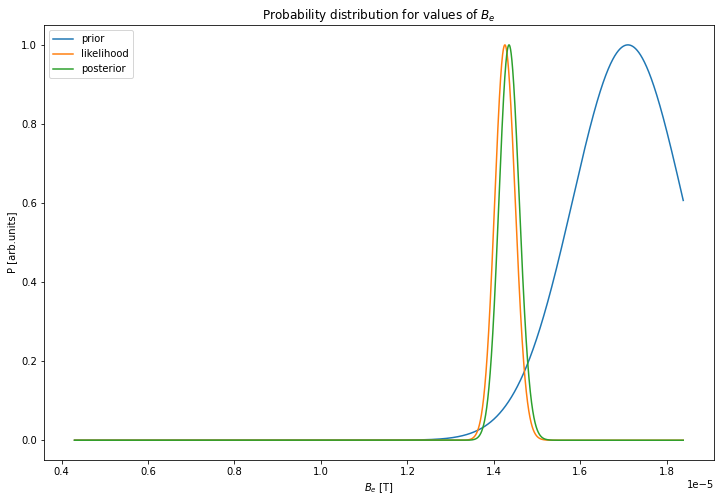

In [114]:
plt.figure(figsize=(12, 8))
plt.plot(B_e, np.exp(logPrior), label='prior')
plt.plot(B_e, np.exp(logL), label='likelihood')
plt.plot(B_e, np.exp(logPost), label='posterior')
plt.xlabel('$B_e$ [T]')
plt.ylabel('P [arb.units]')
plt.legend()
plt.title(r"Probability distribution for values of $B_e$")
plt.show()

In [115]:
B_e[1427]
# Mest sandsynlige værdi. 1427 var fundet med list.index(max(list))


5.304658232911648e-06

In [116]:
def gauss(x, mu, sigma, k): # Fit, til posterior
    return k*np.exp(-1/2 *((x-mu)/sigma)**2)

par, cov = curve_fit(gauss, B_e, np.exp(logPost))

print(*par)

1.43533684619491e-05 -2.358098234666793e-07 0.9999367109097713


In [117]:
data 

,theta,I,N,a,z,B_z
0,0.244346,0.25,1,0.050,0.00,3.150000e-06
1,0.453786,0.54,1,0.050,0.00,6.804000e-06
2,0.558505,0.75,1,0.050,0.00,9.450000e-06
3,0.733038,0.99,1,0.050,0.00,1.247400e-05
4,0.837758,1.25,1,0.050,0.00,1.575000e-05
5,0.942478,1.49,1,0.050,0.00,1.877400e-05
6,1.012291,1.75,1,0.050,0.00,2.205000e-05
7,1.047198,2.00,1,0.050,0.00,2.520000e-05
8,0.383972,0.75,1,0.095,0.00,4.973684e-06
9,0.593412,0.75,2,0.095,0.00,9.947368e-06


In [119]:
np.mean(data.B_z/np.tan(data.theta))


1.3978733036694114e-05